# Final Project Template

# Analysis of Housing attributes to determine changes of Housing Prices.

**William George**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract
We were given a real-world project to create a linear regression modeling that could be applied to a multitude of industries. I was a bit apprehensive about some of the qualitative/categorical columns but many of them turned out to be useless. I used a combination qualitative variables and quantitative variables to achieve a Pearson coefficient score of 0.85 with my trained model and 0.72 with my test data.

[Back to top](#Index)


## 1. Introduction

We were given two pieces of data to get started, the data set and the data descriptions. Since the data is mostly useless without the glossary, the descriptions are the best place to get started.
Here we could begin by identifying qualitative and quantitative data and data types as independent variables.

My hypothesis was that qualitative data (a range of values, poor to excellent) would have the biggest impact on correlation since numeric values like square footage could provide some misleading data. A large square footage lot may look intriguing at first but if it was paved or unusable, that wouldn't be useful to our data. Hence some false positive indicators of correlation.

I began by taking note of the qualitative independent variables from the dataset to look for any initial correlation of sale prices. Then chose some quantitative datapoints to support the model.

Now that I had the data I wanted to explore, I would need to
-  Import data and visually inspect.
-  Remove erroneous columns.
-  Clean data and remove NaN values.
-  Plot and analyze distribution of some qualitative values (is it evenly distributed? is this data useful?).
-  Ranking Correlation to SalePrice to determine which columns would best candidates >0.50 correlation coefficient.
-  Imputing our training data into our scatter plot (quantitative data only)
-  Analyzing results trained data results.
-  Compare against model of different independant variables (include qualitative and quantitative data).
-  Testing our model against test data.
-  Analyze results test results against trained data.

## Initial independent variables

I started with obvious, expensive, impactful features that would increase sale price like pool size, lot size, house condition, etc. But found that many of these variables were categorical or unevenly distributed with >90% of rows with the same value (See GarageCond or GarageQual columns). One hot encoding would not have been much use here. So I decided to take quantitative  data from the perspective of someone looking at obvious data points when purchasing a house that would not change like square footage, rooms and full bathrooms to provide numerical data to support my hypothesis. These variables would be readily available to anyone looking to purchase without an audit by a realitor. I picked these in addition to the variables picked by Dr. Williams. 

#### Quantitative Variables
- LotArea: lot size in square feet.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- GarageArea: square footage of garage.

#### Qualitative Variables
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house  - this ended up being a poor correlation. 

#### Reasoning
I wanted to use a good blend of qualitative data and quantitative data since quantitative data can be misleading and has no indicator of a 'poor' rating in this case. A small lot footprint doesn't tell us much about the property, this could be a misleading or false indicator of property value.


[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 



[Back to top](#Index)

### 2.1 Import the Data
Here are the libraries I used to manipulate the data:

```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
```
- matplotlib.pyplot - to plot the scatter plot
- numpy - to creating arrays and most of the arithmetic
- pandas - to import the csv and manipulate the dataframe
- sklearn and linear_model module - for the linear regression modeling

Then, after downloading the csv from emeritus, imported into jupyter:

```python
house_csv = pd.read_csv('houseSmallData.csv')
```
with a quick visual analysis, with 
```python
house_csv.head()
```
Permanently removed unnecssary column 'Unnamed: 0' with
```python
house_csv.drop('Unnamed: 0', axis=1,inplace=True)
```

Then compared the data description text to quickly review the datatypes and values in each column.
I added some notes to the data descriptions document to identify if columns would be useful or not.

In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

house_csv = pd.read_csv('houseSmallData.csv')
house_csv.head()
house_csv.drop('Unnamed: 0', axis=1,inplace=True)


[Back to top](#Index)

### 2.2 Data Exploration

The data descriptions file is always the best place to start. I had a good idea of which columns I wanted to start looking at but needed to know data types and if they were categorical vs numerical. I knew numeric values like square footage would be helpful but qualitative columns would support my hypothesis that these were the most impactful. 

I looped through all the qualitative columns and added them to a list, then created subplots for them. I isolated and analyzed the qualitative columns and found that ```OverallQual``` was the best candidate for a ranged, qualitative variable. It was the most evenly distributed compared to the others.

Then I could move on to the quantitative columns.


These were the qualitative columns I wanted to analyze ['OverallQual', 'ExterQual', 'BsmtQual', 'LowQualFinSF', 'KitchenQual', 'GarageQual']


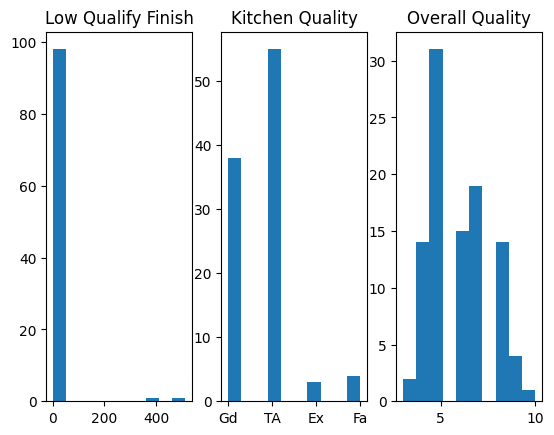

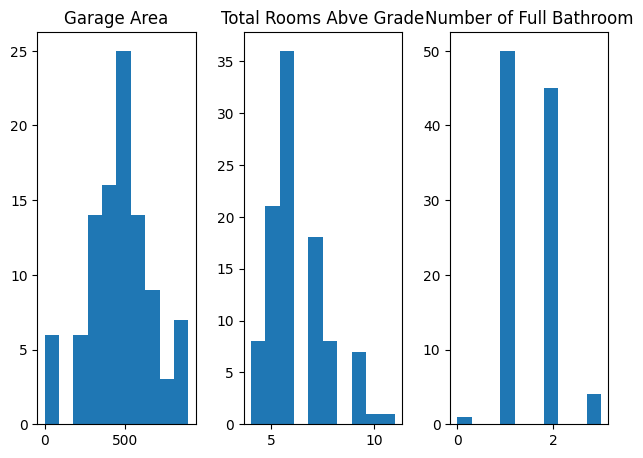

In [231]:
qual_cols = []

for x in house_csv.columns:
    if 'Qual' in x:
        qual_cols.append(x)
    else:
        continue

print(f'These were the qualitative columns I wanted to analyze {qual_cols}') #this creates a list of all the columns that were qualitative.

fig1, axs = plt.subplots(1,3)

#axs[1].hist(house_csv['ExterQual'])
#plt.hist(house_csv['BsmtQual']) - this columns doesn't provide useful data
axs[0].hist(house_csv['LowQualFinSF'])
axs[0].title.set_text('Low Qualify Finish')
axs[1].hist(house_csv['KitchenQual'])
axs[1].title.set_text('Kitchen Quality')
axs[2].hist(house_csv['OverallQual'])
axs[2].title.set_text('Overall Quality')
#axs[3].hist(house_csv['GarageQual']) # - this data wasn't useful either
plt.show()
#I tried to loop through all the columns here and add them to subplots but ran out of time to get my code to work.

fig2, axs = plt.subplots(1,3)
axs[0].hist(house_csv['GarageArea'])
axs[0].title.set_text('Garage Area')
axs[1].hist(house_csv['TotRmsAbvGrd'])
axs[1].title.set_text('Total Rooms Abve Grade')
axs[2].hist(house_csv['FullBath'])
axs[2].title.set_text('Number of Full Bathroom')
fig2.tight_layout(pad = 1.5)


axs[1].hist(house_csv['TotRmsAbvGrd'])
[Back to top](#Index)

### 2.3 Data Preparation

The numeric columns are relatively easy to prepare by removing NaN values but there were several qualitative or categorical values that would have been really helpful. To my dissapointment, most of the categorical data was not helpful. Since the values were unevenly distributed. I used:
```python
garage_cond_cln = house_csv['GarageQual'].dropna()
count = garage_cond_cln.value_counts()
print(count)
```
To quickly get distribution of non-numeric values to and asess if they would be useful or not.

This was another quick analysis of the distribution of values for each categorical column. Almost all of these proved to be useless. Then created my clean data:
```    
clean_data = cols2.select_dtypes(include = [np.number])
```
To get my clean data (x values) to plug into the regression model.

This also supported my hypothesis that qualitative columns/data had the biggest impact.



In [234]:
garage_cond_cln = house_csv['GarageQual'].dropna()
count = garage_cond_cln.value_counts()
print(count) #this will tell you the distribution of values is uneven which makes the data less useful

clean_data = house_csv.select_dtypes(include = [np.number]) #this will remove all non numeric values from our dataset.


GarageQual
TA    90
Fa     3
Gd     1
Name: count, dtype: int64


[Back to top](#Index)

### 2.4 Correlation
I initially chose 10 columns to analyze based on my perspective as a homeowner but could have easily calculated more using Dr William's process.

I ended up with these with best correlation to SalePrice:
- OverallQual: Rates the overall material and finish of the house # good correlation 0.85
- GarageArea: square footage of garage # good correlation to sale price at 0.68
- FullBath: how many full bathrooms are above grade # good correlation of 0.57
- MasVnrArea: correleation at 0.57
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) # ok correlation 0.55
- LotArea: lot size in square feet # ok correlation at 0.49

(see above for calculation)

These were poor candidates
- OverallCond: Rates the overall condition of the house # not a good correlation to saleprice -0.17
- SaleCond: this categorical condition is probably not helpful as it relates to macro issues that would not impact the buyer
- PoolArea: not a good indicator as mostly NaN values
- PoolQC: would have been helpful but all NaN values
- GarageCond: also would have been helpful but mostly TA values - unusable
- GarageQual: also mostly TA values - unusable


In [287]:
corr1 = clean_data.corr() #this will correlate data
fine_corr2 = corr1['SalePrice'].sort_values(ascending=False)[:11] 
clean_best_cols = fine_corr2.index #this will give us a list of ranked list of correleation to top 10 and an index.

clean_data[clean_best_cols]#we can print these out

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
0,208500,7,1710,548,2,2003,856,2003.0,2,196.0,8
1,181500,6,1262,460,2,1976,1262,1976.0,2,0.0,6
2,223500,7,1786,608,2,2001,920,2001.0,2,162.0,6
3,140000,7,1717,642,3,1915,756,1998.0,1,0.0,7
4,250000,8,2198,836,3,2000,1145,2000.0,2,350.0,9
...,...,...,...,...,...,...,...,...,...,...,...
95,185000,6,1470,420,2,1993,680,1993.0,2,68.0,6
96,214000,7,1588,472,2,1999,1588,1999.0,2,183.0,6
97,94750,4,960,432,1,1965,960,1965.0,1,48.0,6
98,83000,5,835,366,1,1920,458,1920.0,1,0.0,5



[Back to top](#Index)

## 3. Project Description
I think someone looking at houses who didn't have a complete dataset to analyze could easily use these categorical values along with the constants like square footage, lot area, total rooms, etc. to predict the values of a house. Alternatively, predict the cost of a house based on their needs or determine if the asking price of the house was above, aligned or under the actual value of the house.

We will analyze several combinations of independant variables to fit our model. These may be available to buyers, sellers or possibly managment companies looking to build new houses.

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is an easy to interpret and commonly used formula for prediction based on trained data. For linear regression to be accurate, a strong correlation must be established between an independant (the variables in our dataset) and a dependant variable (the SalePrice).
Thes corrleations represent a linear relationship (when X increases, so does Y) in order for predictions to be made and new data to fit the model. 

We test the trained data (houseSmallData) first, to establish a fit for our model based on the variables that have good correlation or are available in the future.

Since we used a multi-value linear regression, here's a visual example of our variables to predict y or `SalePrice`:

$ {SalePrice} = \alpha + \beta_{1} OverallQual_{t} + \beta_{2}  GarageArea_{t} + \beta_{3}  FullBath ...  + \epsilon$

Since the relationship is linear, we use the slope-intercept to graph and plot new values.
This would be helpful when using a single independant variation. Let's look at ```OveralQual``` since it has a good correlation coefficient of 0.855061.



$y=mx + b$

To calculate slope for a regression line, you’ll need to divide the standard deviation of y values by the standard deviation of x values and then multiply this by the correlation between x and y. The slope can be negative, which would show a line going downhill rather than upwards.



[Back to top](#Index)

### 3.2 Analysis 

I created 3 scenarios where a linear regression model and independant variables would be relative.

*Homebuyer* -  Family interested in the quality of the house, rooms available and other details about the house itself.

*Seller* - Maybe a seller wanted to highlight the year the house was built, if it was remodeled, the veneer area, etc to show that the house has had some work done and the value is appropriate.

*Developer* - A company looking to build a new house on exisiting property, these would not include details about the house but area and square footage only.



If a homebuyer was looking at livable space only, they could decide based on this criteria if a house was priced over, under or average based on it's criteria.

Qualitative score of 0.797, this scored well to determine if price was on target.


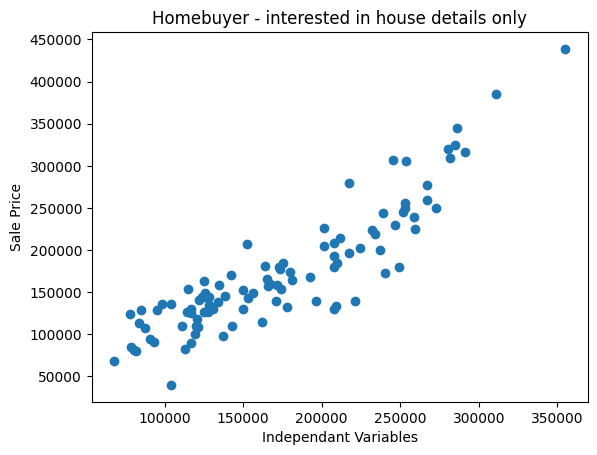

In [337]:
#clean_data.drop('SalePrice', axis = 1)
buy_x = clean_data[['OverallQual','GrLivArea','GarageArea','TotRmsAbvGrd']]#independant variables
y = clean_data['SalePrice']#our dependant variable

lr = linear_model.LinearRegression()
model = lr.fit(buy_x,y)

predictions = model.predict(buy_x) #this generates the predicted x value to be paired wity y

plt.scatter(predictions,y)#creates the plot
plt.title('Homebuyer - interested in house details only')
plt.xlabel('Independant Variables')
plt.ylabel('Sale Price')
buy_score = model.score(buy_x,y)#calculates our Rsquared score
print(f'Qualitative score of {round(buy_score,3)}, this scored well to determine if price was on target.')

Let's look at a model from a seller's point of view. What indpendant variables would be important to them?

Qualitative score of 0.795, this scored well


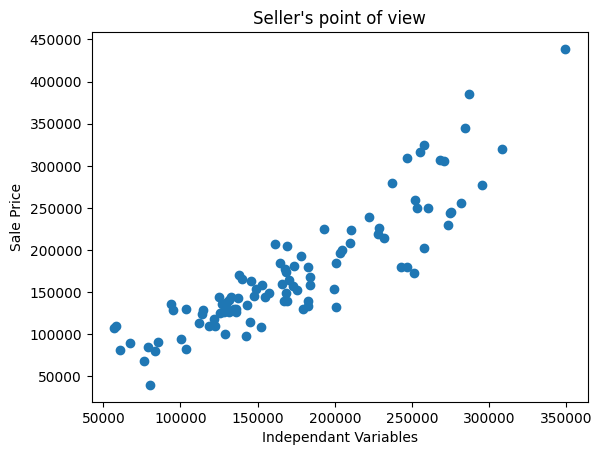

In [344]:
x = clean_data[['OverallQual','YearRemodAdd','TotalBsmtSF','MasVnrArea']]
y = house_csv['SalePrice']

lr = linear_model.LinearRegression()
model = lr.fit(x,y)

predictions = model.predict(x)

plt.scatter(predictions,y)
plt.title('Seller\'s point of view')
plt.xlabel('Independant Variables')
plt.ylabel('Sale Price')
sell_score = model.score(x,y)
print(f'Qualitative score of {round(sell_score,3)}, this scored well')

Now let's look at the perspective of a developer, they want to know how to price a house based on the available acreage.
This would represent a less than ideal score for someone looking for a plot to build.

Qualitative score of 0.688, this scored poorly without qualitative data about the house


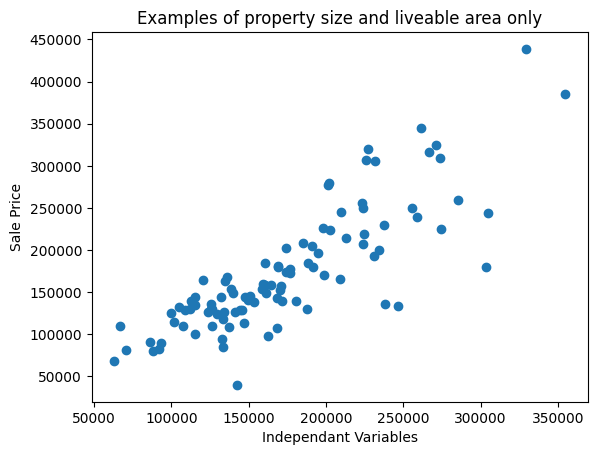

In [316]:
dev_x = clean_data[['LotArea','2ndFlrSF','1stFlrSF','TotalBsmtSF']]
y = house_csv['SalePrice']

lr = linear_model.LinearRegression()
model = lr.fit(dev_x,y)

predictions = model.predict(dev_x)

plt.scatter(predictions,y)
plt.title('Examples of property size and liveable area only')
plt.xlabel('Independant Variables')
plt.ylabel('Sale Price')
dev_score = model.score(x,y)
print(f'Qualitative score of {round(dev_score,3)}, this scored poorly without qualitative data about the house')

[Back to top](#Index)

### 3.3 Results

Below is a quick data frame of the results by scenario.

A developer might have a difficult time predicting the cost (and margin) of a house they could built by analyzing acreage and lot size alone. 

If a seller was having difficulty selling on the market, they could identify if their house price was in-line or not with other houses on the market.

A buyer would be able to predict the cost of a house based on quality (they could determine to remain a constant) and some of the interior features.


In [340]:
dict = {
    'Rank':[2,1,3],
    'Scenario':['Buyer','Seller','Developer'],
    'Score':[buy_score,sell_score,dev_score],
    'Variables':['Quan and Qual','Quan and Qual','Quan only']
}
score = pd.DataFrame(dict)
score.sort_values('Rank')

,Rank,Scenario,Score,Variables
1,1,Seller,0.795489,Quan and Qual
0,2,Buyer,0.796651,Quan and Qual
2,3,Developer,0.688392,Quan only


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

I used the same code and process to download the file, filter to the same columns as the original data and then clean it to create a dataframe called `clean_test_data`.

This score was satisfactory with 0.772 as the r squared value. 



Our trained data has a Pearson score of 0.7726181503170613


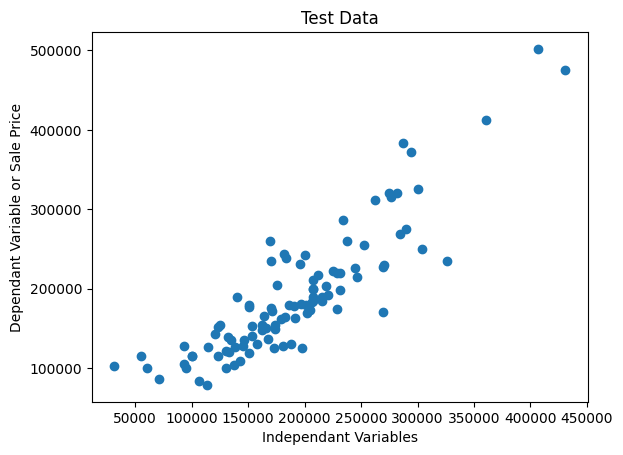

In [345]:
test_csv = pd.read_csv('Jtest.csv')

clean_test_data = test_csv.select_dtypes(include = [np.number])

cols3 = clean_test_data[
    ['OverallQual',
    'LotArea',
    'GarageArea',
    'SalePrice',
    'MasVnrArea',
    'FullBath',
    'TotRmsAbvGrd']]
    

#quick corrleation check

fine_corr3 = clean_test_data.corr()
fine_corr3['SalePrice'].sort_values(ascending=False)

#these 

x_test = cols3.drop('SalePrice',axis=1)
y_test = clean_test_data['SalePrice']

lr = linear_model.LinearRegression()
model = lr.fit(x_test,y_test)

predictions_test = model.predict(x_test)

plt.scatter(predictions_test,y_test)
plt.title('Test Data')
plt.xlabel('Independant Variables')
plt.ylabel('Dependant Variable or Sale Price')
test_score = model.score(x_test,y_test)

print(f'Our trained data has a Pearson score of {test_score}')



[Back to top](#Index)

## Conclusion

After reading the data glossary first, I was eager to use the qualitative data to prove that it proved to be a better correlation than the quantitative data. However, the strongest correlation was between the ```OverallQual``` and sale price at 0.855 coefficient.  However, this could lead to false positives as the rating could be varied between auditor or perhaps a seller to increase the sale price of their house.

Of the three scenarios, a developer might have a difficult time predicting how much they could make by lot size and square footage alone. There might need to be other features to help them predict the sale price of a house and how many floors, or rooms to build.

A seller could accurately price their house based on when it was remodeled, the year it was built and the overall quality.

A buyer would be able to predict the cost of a house based on quality and rooms in an area they want to live to see if it was in line with other houses or not. This may help them identify if there were issues with the house if it was priced under-market.

In conclusion, this linear regression model has a vast application of uses looking to predict prices or understand if the price of their house was above, below or inline with the market.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

- https://aws.amazon.com/what-is/linear-regression/#:~:text=Businesses%20use%20it%20to%20reliably,analysis%20and%20predict%20future%20trends.

- StackExchange {TEX} - https://tex.stackexchange.com/questions/218599/multiline-regression-equation-in-latex

- scikit learn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

